<a href="https://colab.research.google.com/github/Teakinboyewa/Image-processing/blob/main/Normalized_Difference_Vegetation_Index_(NDVI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# Insert the directory
import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/lib')

# Import your module or file
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [73]:
import os
os.listdir('/Landsat8')

['LC08_L1TP_190055_20200214_B8.tif',
 'LC08_L1TP_190055_20200214_B7.tif',
 'LC08_L1TP_190055_20200214_B6.tif',
 'LC08_L1TP_190055_20200214_B3.tif',
 'Output',
 'LC08_L1TP_190055_20200214_B1.tif',
 'LC08_L1TP_190055_20200214_B4.tif',
 'LC08_L1TP_190055_20200214_B5.tif',
 'LC08_L1TP_190055_20200214_B2.tif',
 'LC08_L1TP_190055_20200214_B9.tif',
 '.ipynb_checkpoints']

In [74]:
band4 = rasterio.open('/Landsat8/LC08_L1TP_190055_20200214_B4.tif') # red
band5 = rasterio.open('/Landsat8/LC08_L1TP_190055_20200214_B5.tif') #

In [75]:
band4.height

1363

In [76]:
band4.width

1482

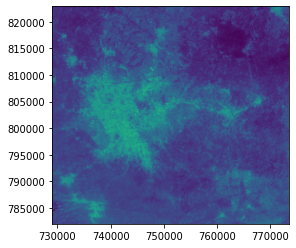

In [77]:
plot.show(band4)

In [78]:
band4.dtypes[0]

'uint16'

In [79]:
band4.crs

CRS.from_epsg(32631)

In [80]:
band4.transform

Affine(29.997848381405237, 0.0, 728981.579757069,
       0.0, -29.99239413508582, 822910.0238469004)

In [81]:
band4.read(1)

array([[10384, 10437, 10510, ..., 10994, 11050, 11344],
       [10388, 10426, 10492, ..., 10695, 10743, 10835],
       [10424, 10420, 10473, ..., 10642, 10615, 10643],
       ...,
       [10718, 10908, 11102, ..., 10847, 10831, 10804],
       [10760, 10908, 11021, ..., 10852, 10857, 10860],
       [10876, 10936, 10986, ..., 10855, 10850, 10858]], dtype=uint16)

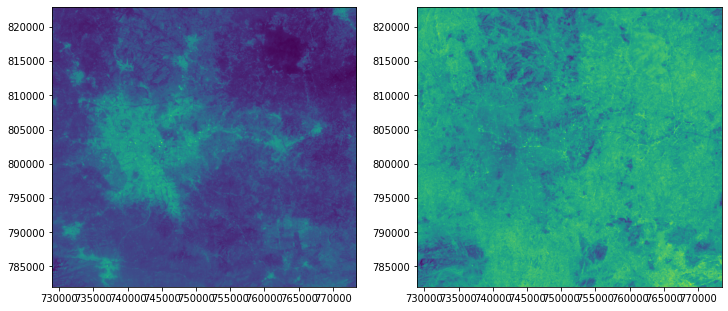

In [82]:
#multiple band representation
fig,(ax1, ax2)=plt.subplots(1,2, figsize=(12,6))


plot.show(band4, ax=ax1, cmap=None)  #blue

plot.show(band5, ax=ax2, cmap=None) #nir

In [83]:
# Change the reaster to float
red =band4.read(1).astype('float64')
nir =band5.read(1).astype('float64')


In [84]:
# To avoid division by zero probably where we do not data
ndvi = np.where(
    (nir+red)==0.,
    0,
    (nir-red)/(nir+red)
    
)
ndvi

array([[0.20080043, 0.19884859, 0.19651389, ..., 0.16932376, 0.1651241 ,
        0.15343284],
       [0.20659895, 0.20070531, 0.20249316, ..., 0.19450198, 0.19510002,
        0.19256278],
       [0.20775223, 0.19849237, 0.20305901, ..., 0.20036067, 0.20836751,
        0.21618736],
       ...,
       [0.17251496, 0.15917675, 0.14117738, ..., 0.17538391, 0.17872308,
        0.17746479],
       [0.17218034, 0.16442606, 0.15196984, ..., 0.17090687, 0.17402716,
        0.17001032],
       [0.16005715, 0.15737566, 0.15031517, ..., 0.16953561, 0.17430844,
        0.16736321]])

In [86]:
ndviImage=rasterio.open('/Landsat8/Output/ndviImage.tiff', 'w', driver = 'Gtiff',
                        width = band4.width, height = band4.height,
                        count=1,
                        crs=band4.crs,
                        transform=band4.transform,
                        dtype='float64'
                        )
ndviImage.write(ndvi,1)
ndviImage.close()

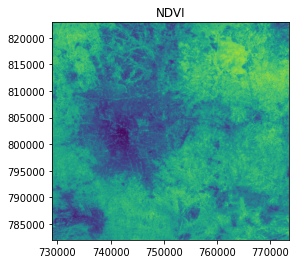

In [87]:
ndvi = rasterio.open('/Landsat8/Output/ndviImage.tiff')
plt.title('NDVI')
plot.show(ndvi)